In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [3]:
df = pd.read_csv("MER_T12_06.csv")
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [5]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [6]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [7]:
#ss = ts.copy(deep=True)
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [8]:
ts.dtypes

MSN              object
Value           float64
Column_Order      int64
Description      object
Unit             object
dtype: object

In [9]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4932 entries, 1973-01-01 to 2018-08-01
Data columns (total 5 columns):
MSN             4932 non-null object
Value           4548 non-null float64
Column_Order    4932 non-null int64
Description     4932 non-null object
Unit            4932 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 231.2+ KB


In [10]:
ts.dropna(inplace = True)

In [11]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4548 entries, 1973-01-01 to 2018-08-01
Data columns (total 5 columns):
MSN             4548 non-null object
Value           4548 non-null float64
Column_Order    4548 non-null int64
Description     4548 non-null object
Unit            4548 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 213.2+ KB


In [12]:
Energy_sources = ts.groupby('Description')

In [13]:
Emissions = ts.iloc[:,1:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Description', pd.TimeGrouper('M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Coal Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
mte.head()

YYYYMM
1973-01-31    72.076
1973-02-28    64.442
1973-03-31    64.084
1973-04-30    60.842
1973-05-31    61.798
Name: Coal Electric Power Sector CO2 Emissions, dtype: float64

In [14]:
mte.tail()

YYYYMM
2018-04-30     73.611
2018-05-31     86.092
2018-06-30    101.692
2018-07-31    115.765
2018-08-31    115.582
Name: Coal Electric Power Sector CO2 Emissions, dtype: float64

In [15]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

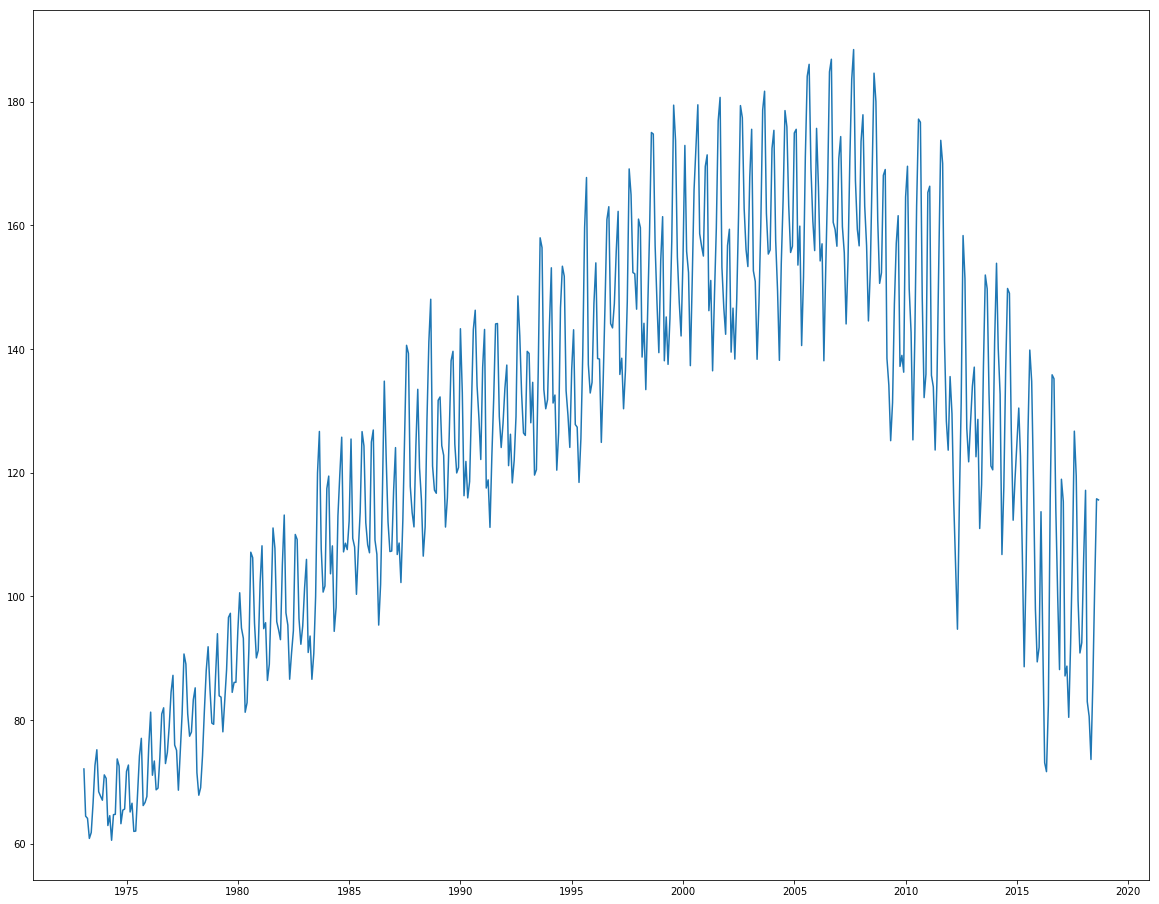

In [16]:
plt.plot(mte)

In [17]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [18]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

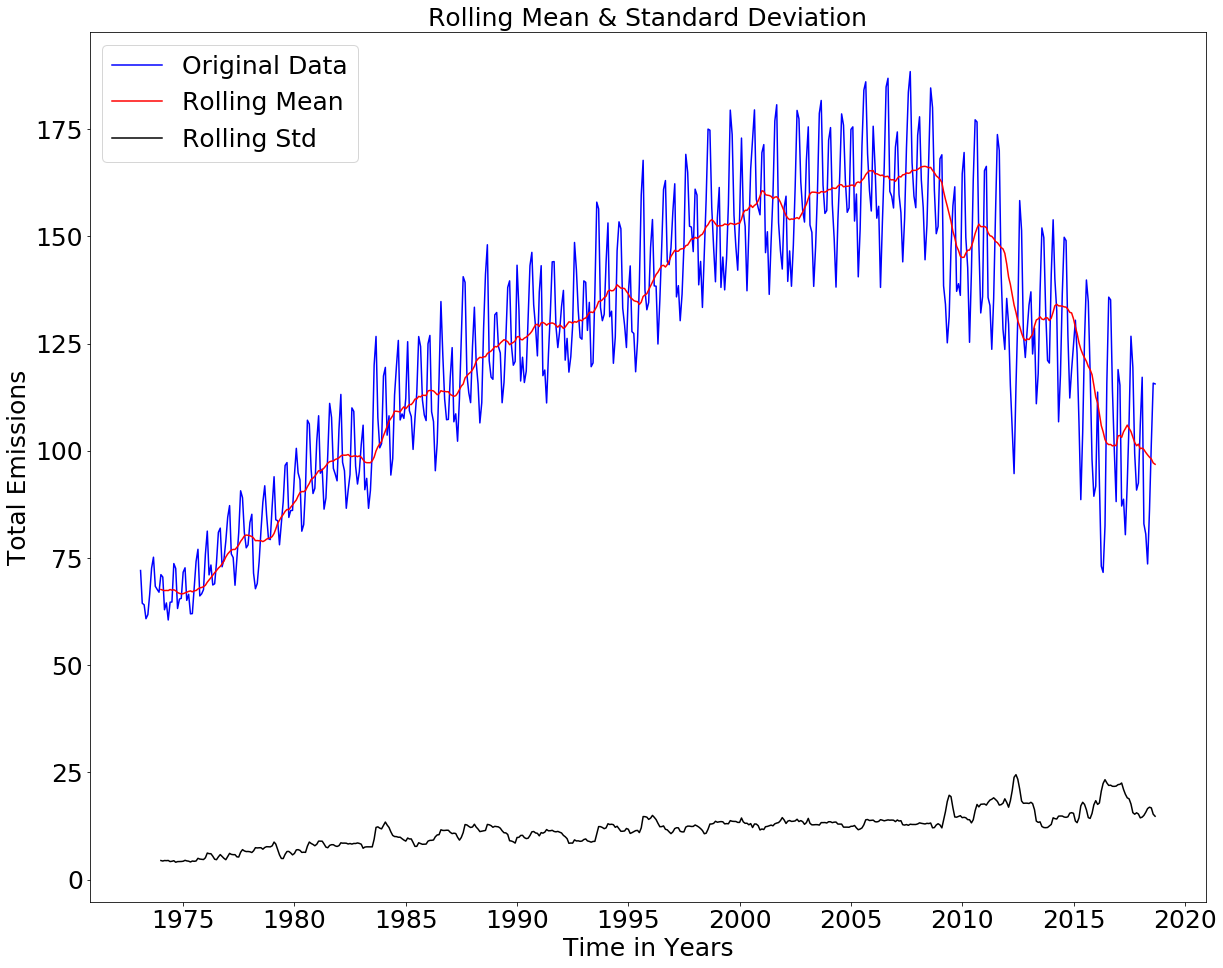

In [19]:
TestStationaryPlot(mte)

In [20]:
TestStationaryAdfuller(mte)

Test Statistic                  -1.753511
p-value                          0.403774
#Lags Used                      14.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


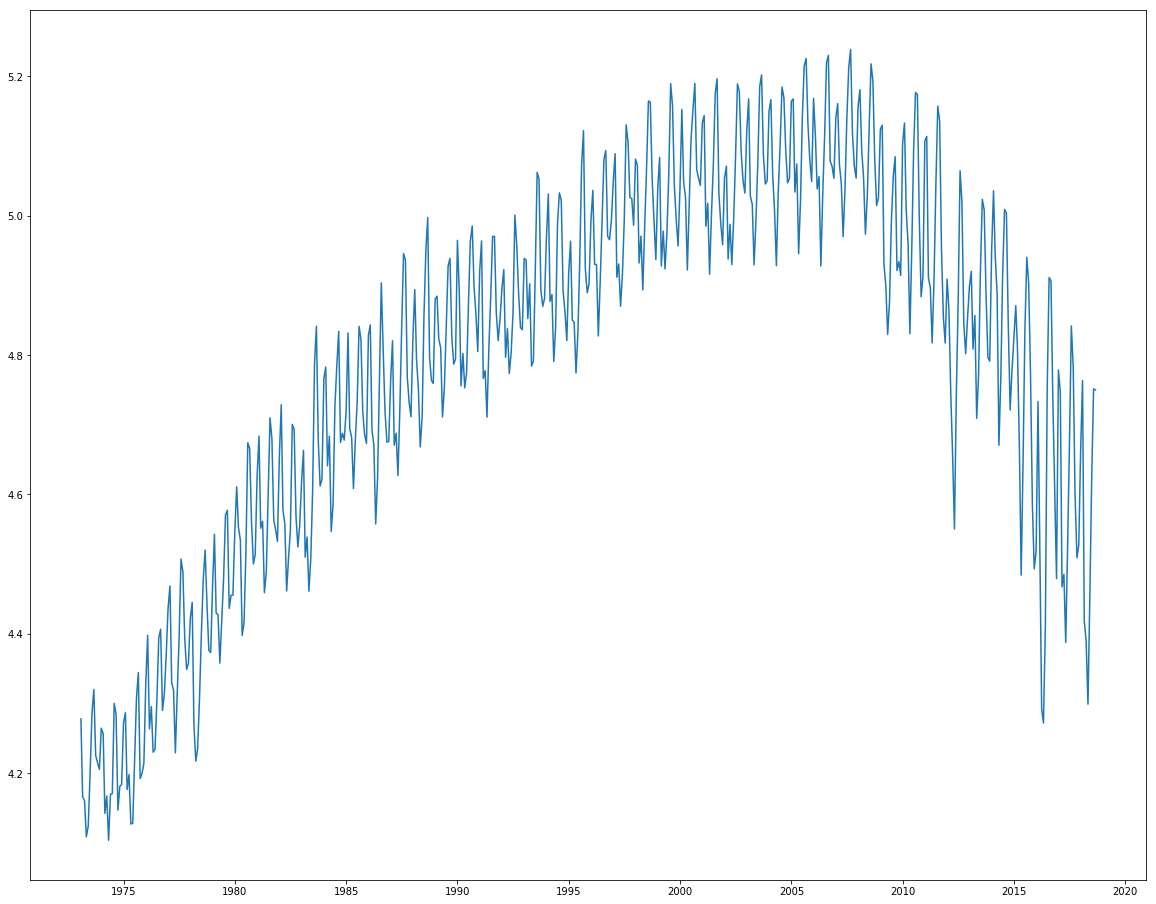

In [21]:
ts_log = np.log(mte)
plt.plot(ts_log)

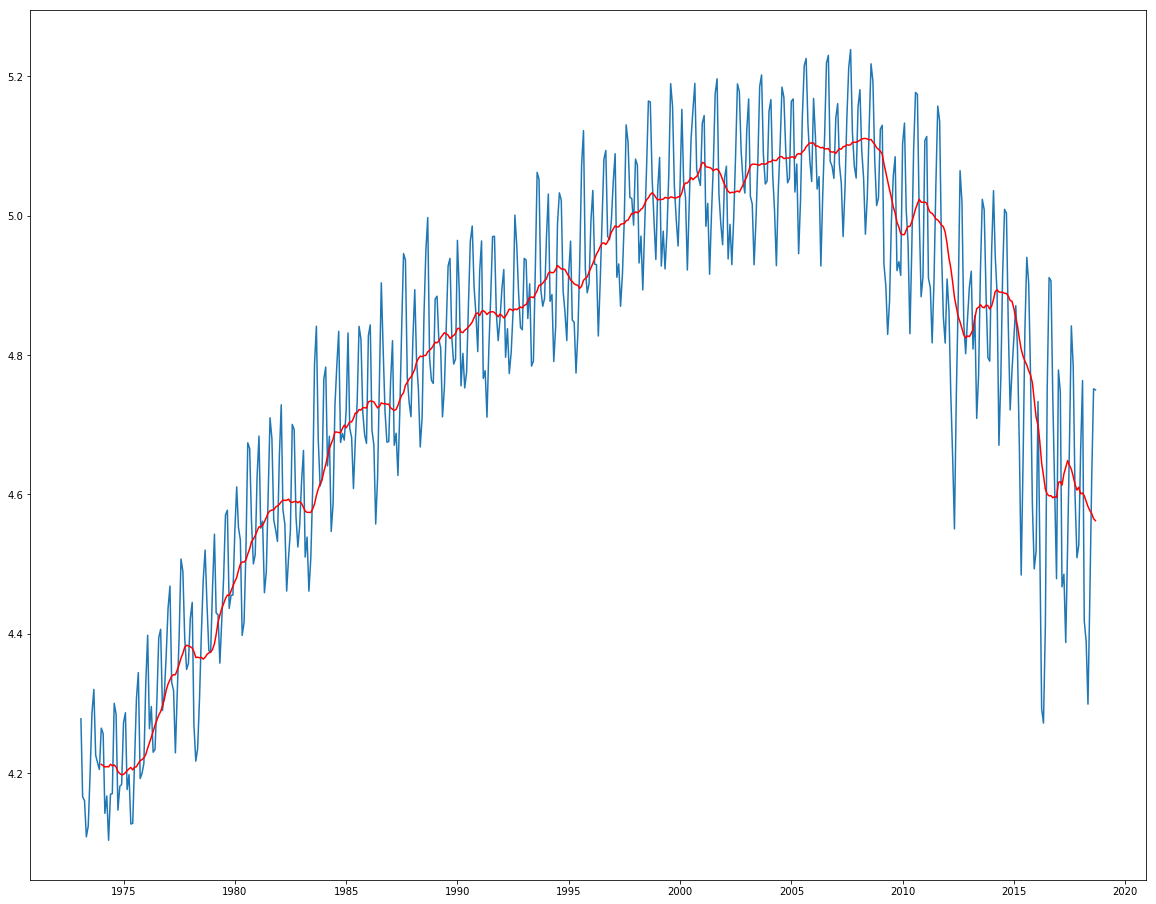

In [22]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [23]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

YYYYMM
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31         NaN
1973-08-31         NaN
1973-09-30         NaN
1973-10-31         NaN
1973-11-30         NaN
1973-12-31    0.051997
Name: Coal Electric Power Sector CO2 Emissions, dtype: float64

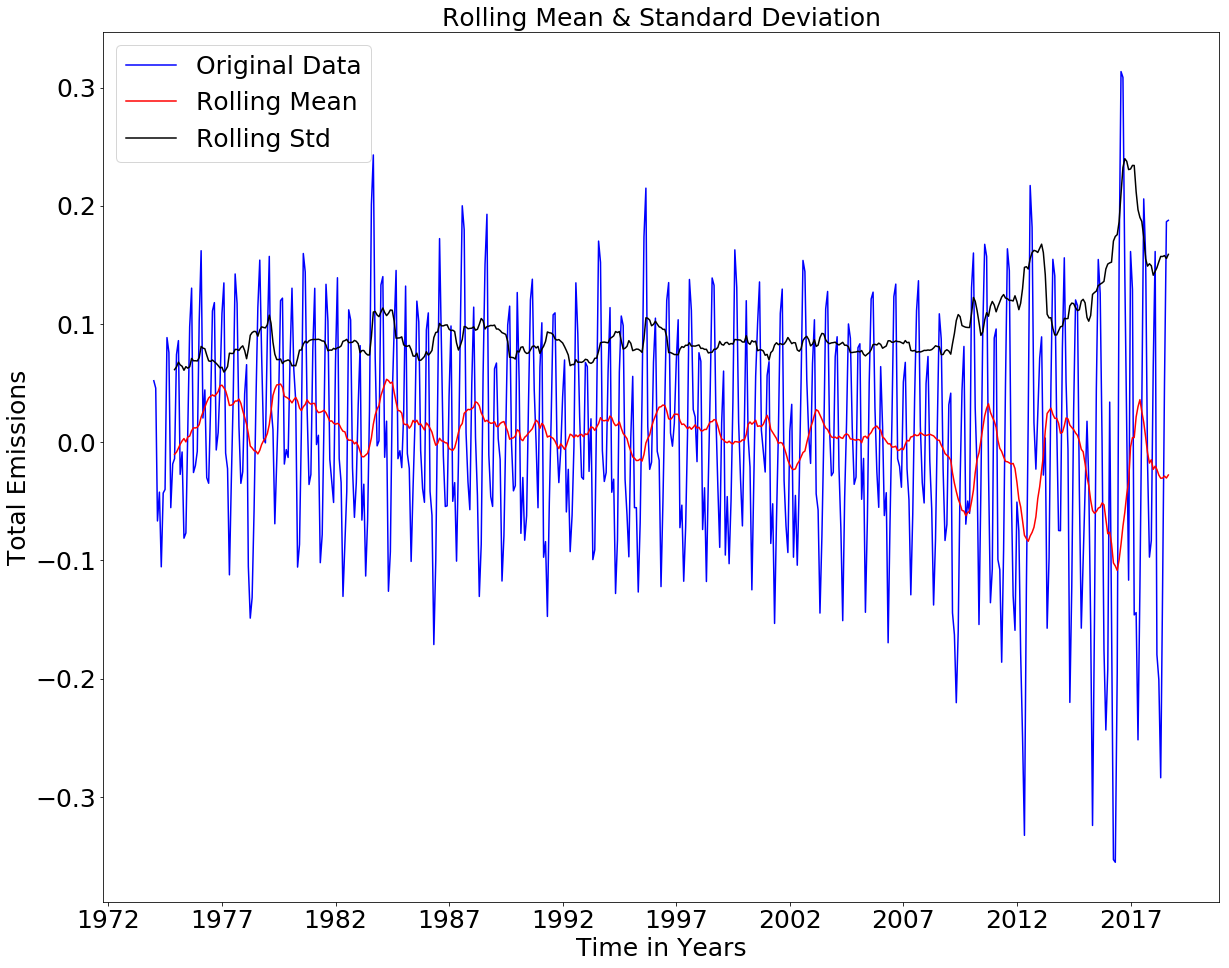

In [25]:
ts_log_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(ts_log_moving_avg_diff)

In [26]:
TestStationaryAdfuller(ts_log_moving_avg_diff)

Test Statistic                -6.043702e+00
p-value                        1.327258e-07
#Lags Used                     1.400000e+01
Number of Observations Used    5.220000e+02
Critical Value (1%)           -3.442940e+00
Critical Value (5%)           -2.867093e+00
Critical Value (10%)          -2.569727e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


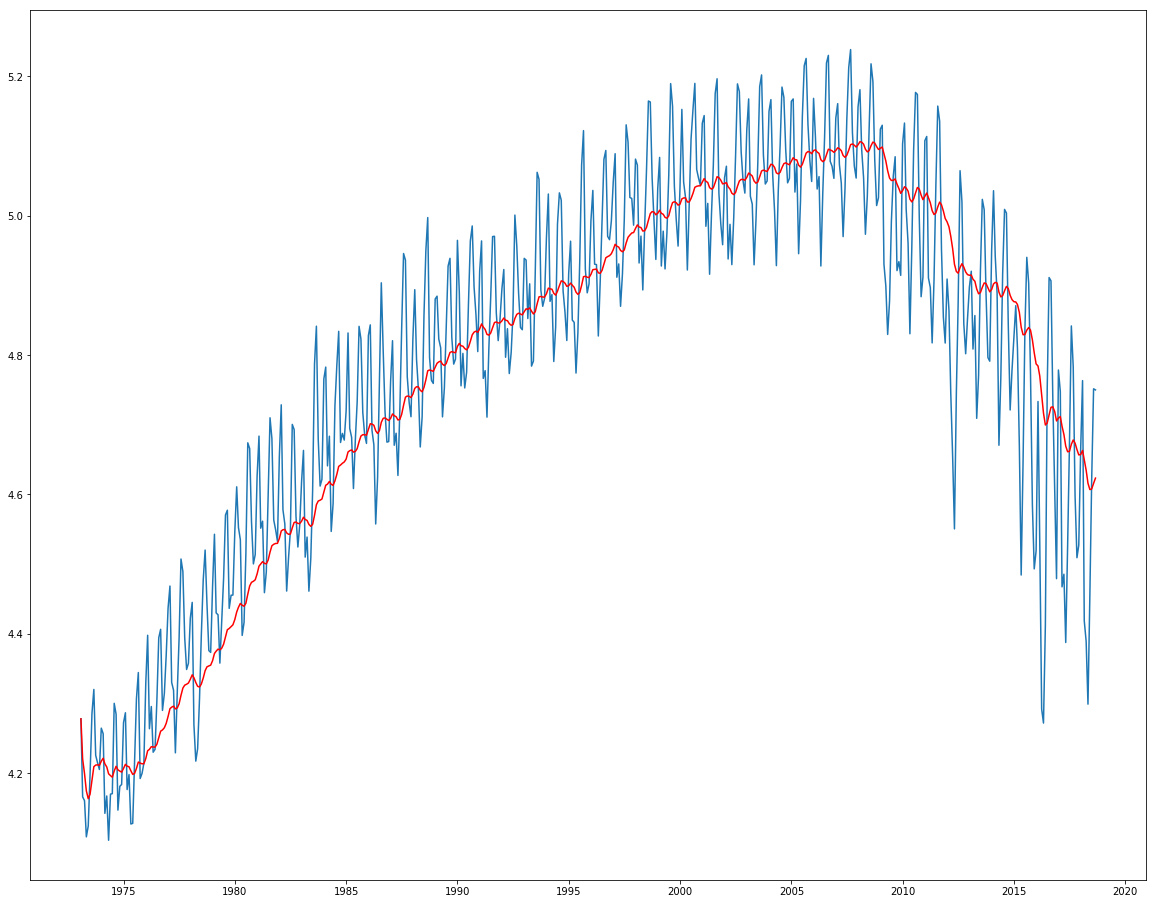

In [28]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

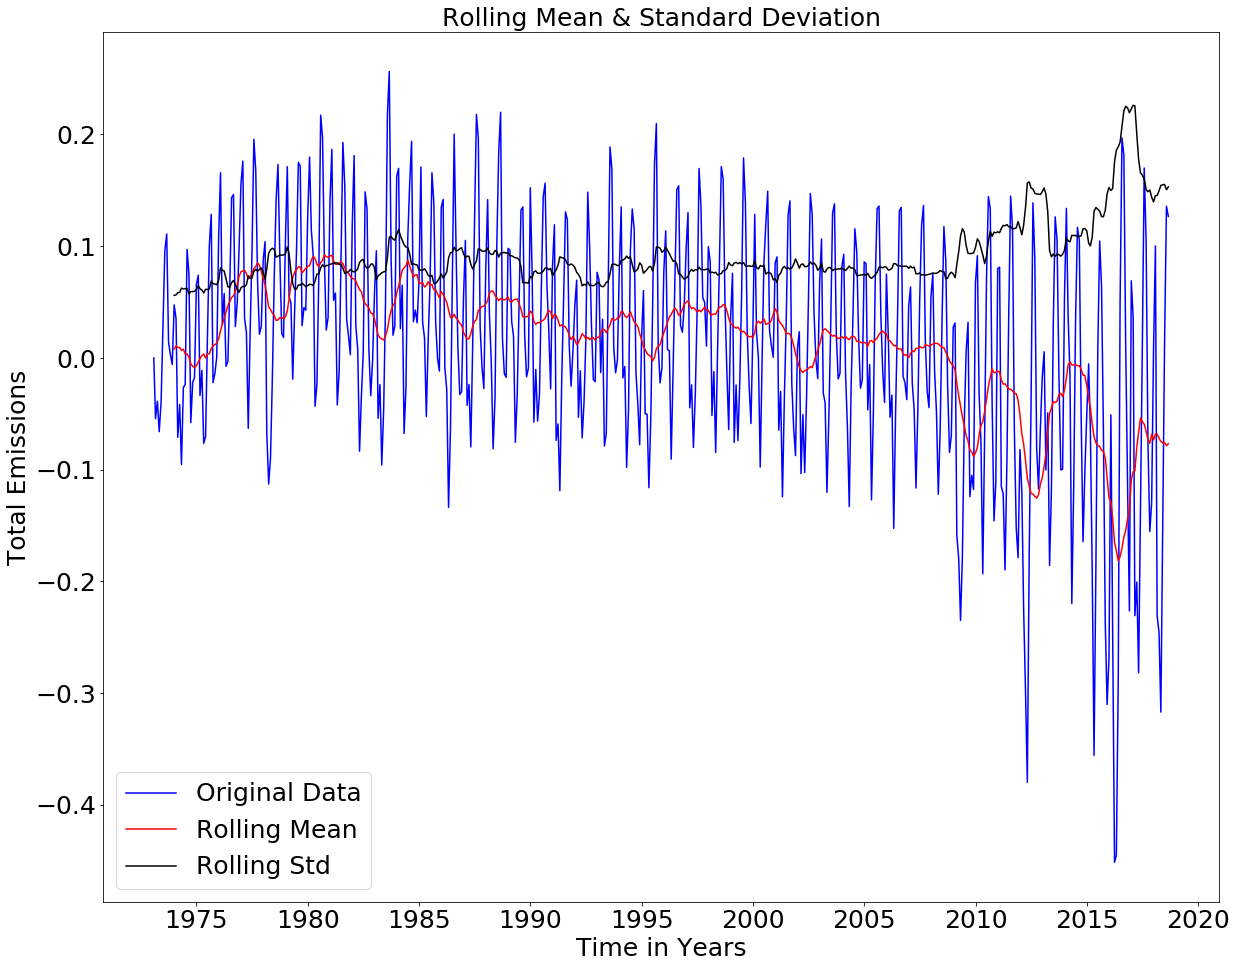

In [30]:
ts_log_ewma_diff = ts_log - expwighted_avg
TestStationaryPlot(ts_log_ewma_diff)

In [31]:
TestStationaryAdfuller(ts_log_ewma_diff)

Test Statistic                  -2.510361
p-value                          0.112974
#Lags Used                      16.000000
Number of Observations Used    531.000000
Critical Value (1%)             -3.442725
Critical Value (5%)             -2.866998
Critical Value (10%)            -2.569677
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


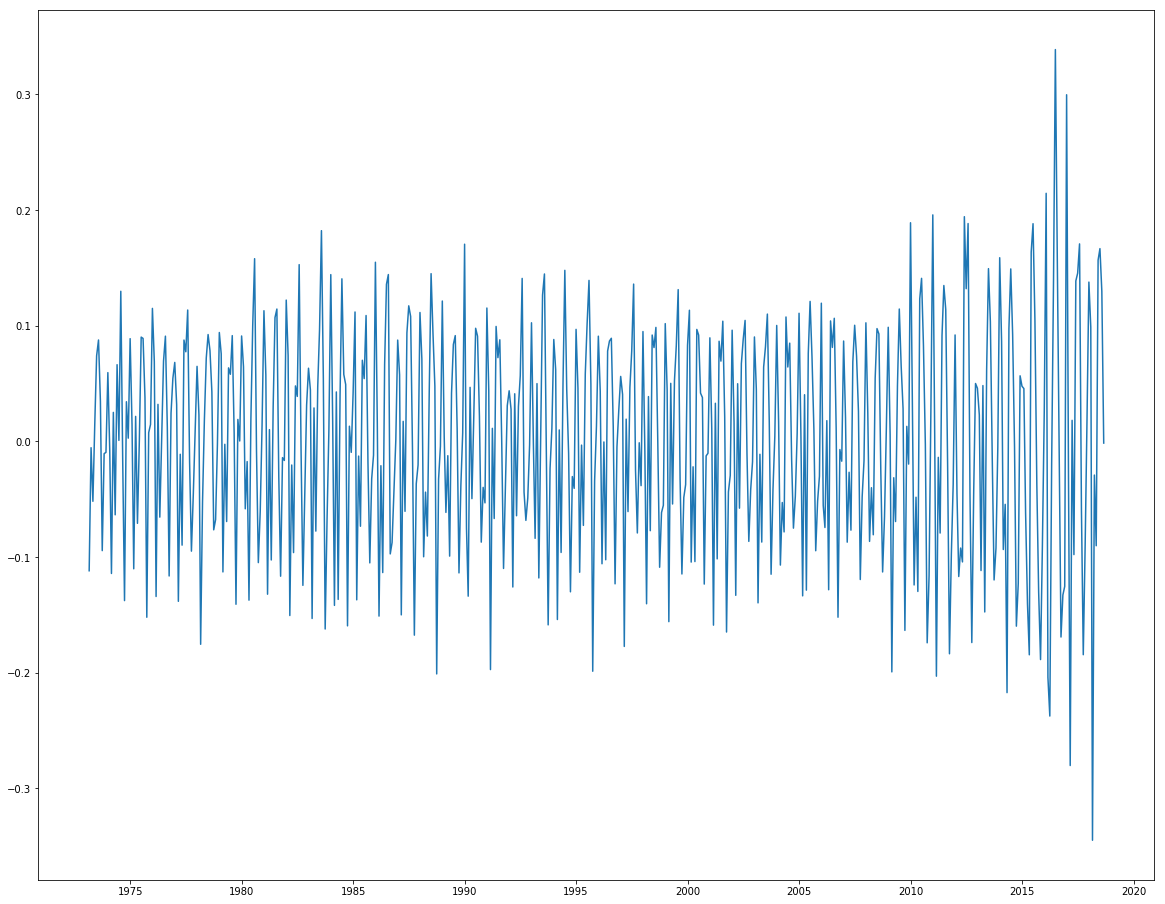

In [32]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

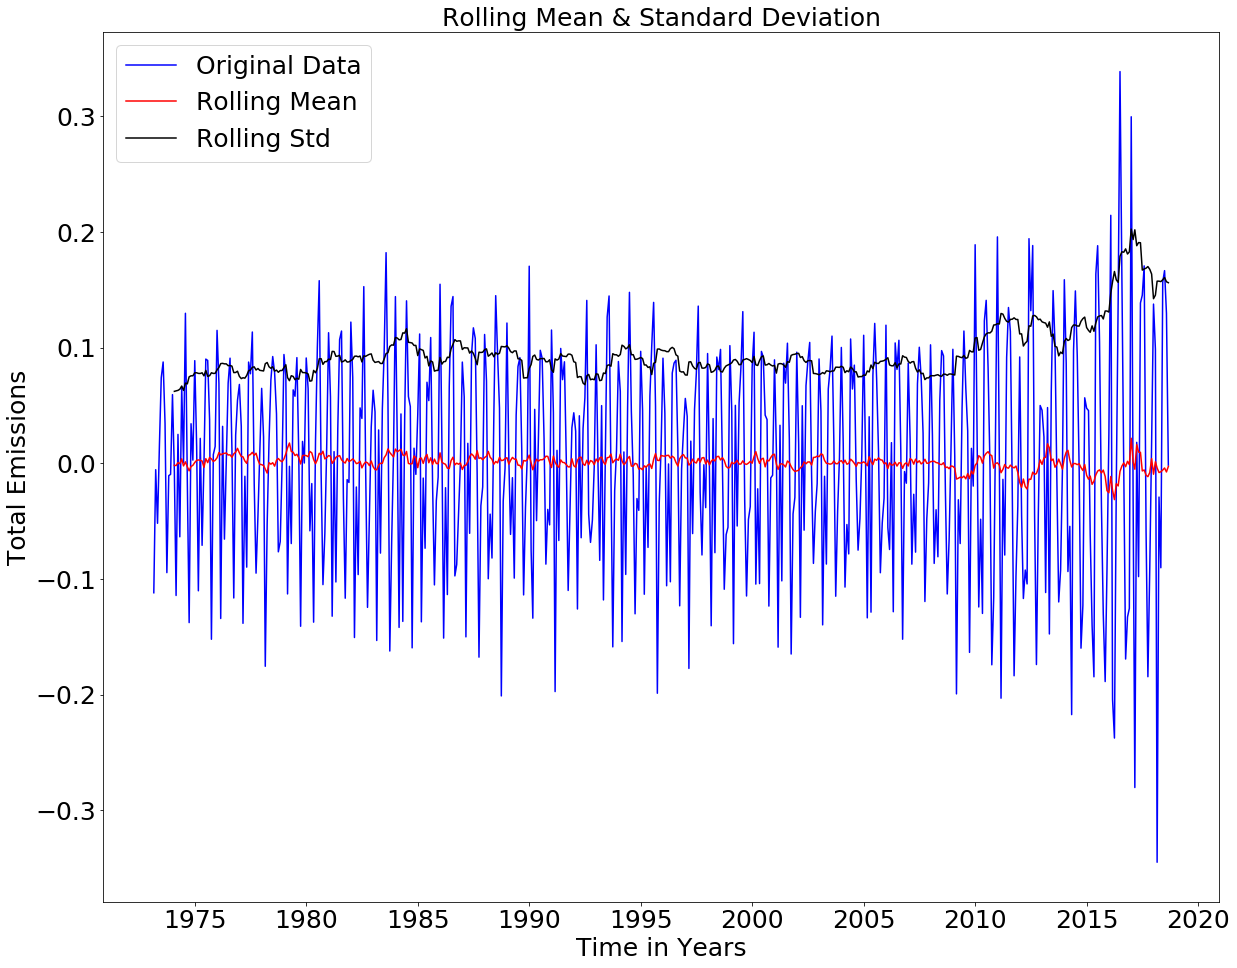

In [33]:
ts_log_diff.dropna(inplace=True)
TestStationaryPlot(ts_log_diff)

In [34]:
TestStationaryAdfuller(ts_log_diff)

Test Statistic                -5.726795e+00
p-value                        6.742131e-07
#Lags Used                     1.300000e+01
Number of Observations Used    5.330000e+02
Critical Value (1%)           -3.442678e+00
Critical Value (5%)           -2.866978e+00
Critical Value (10%)          -2.569666e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


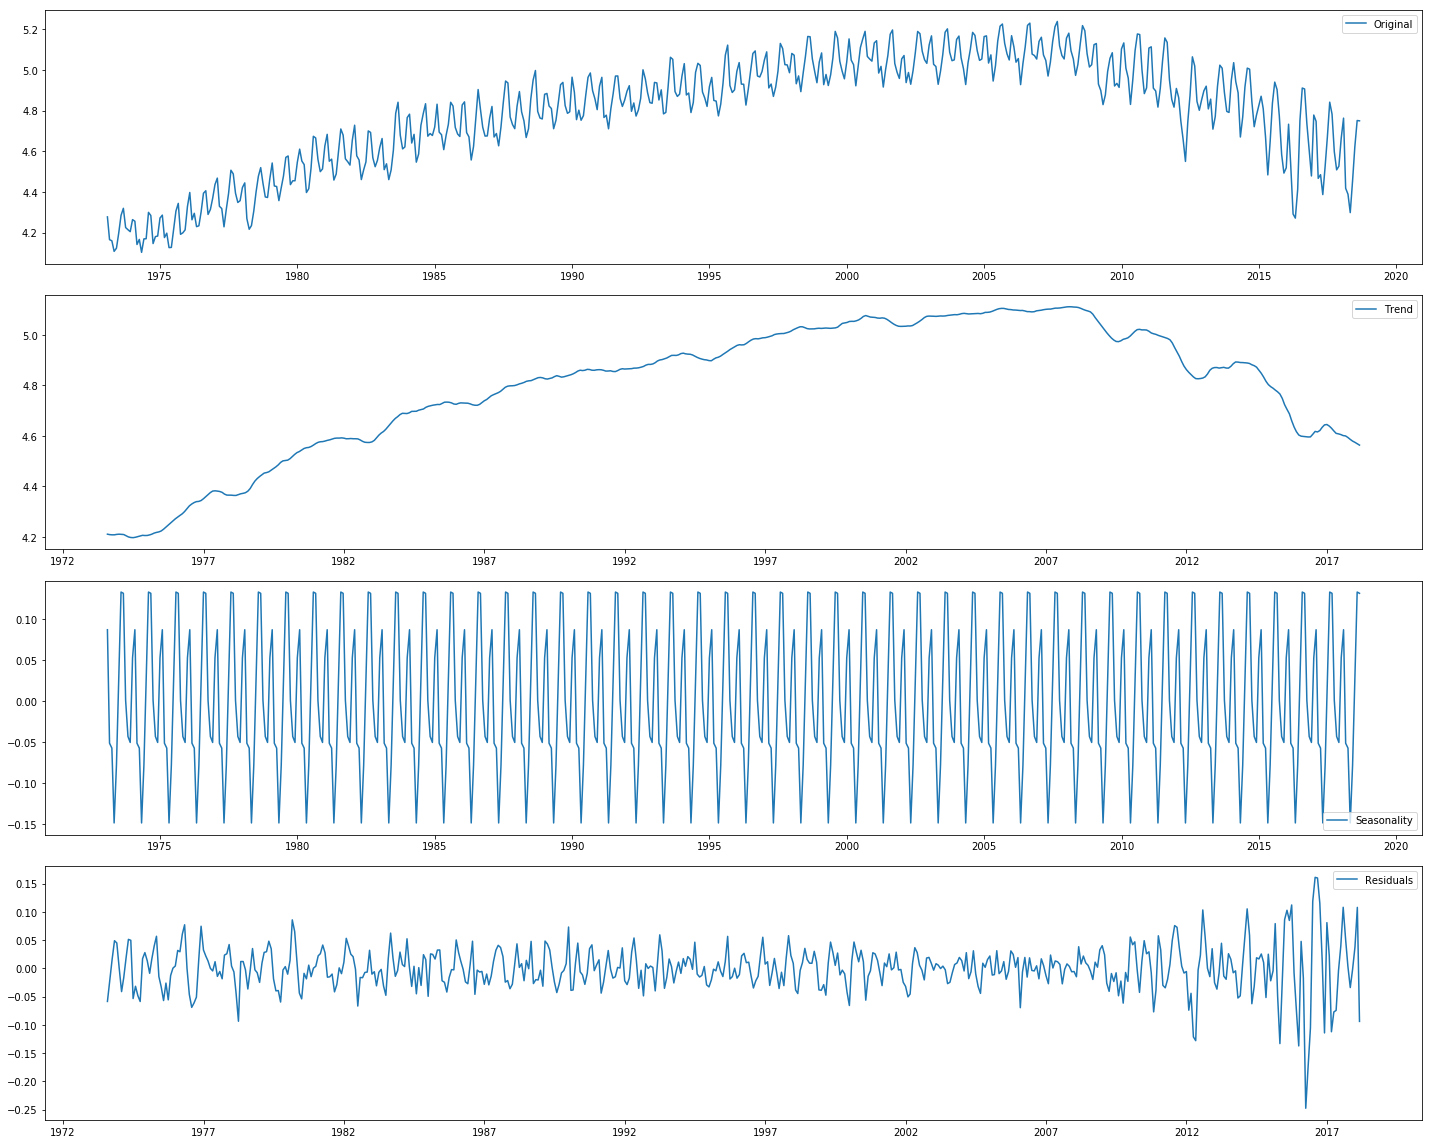

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

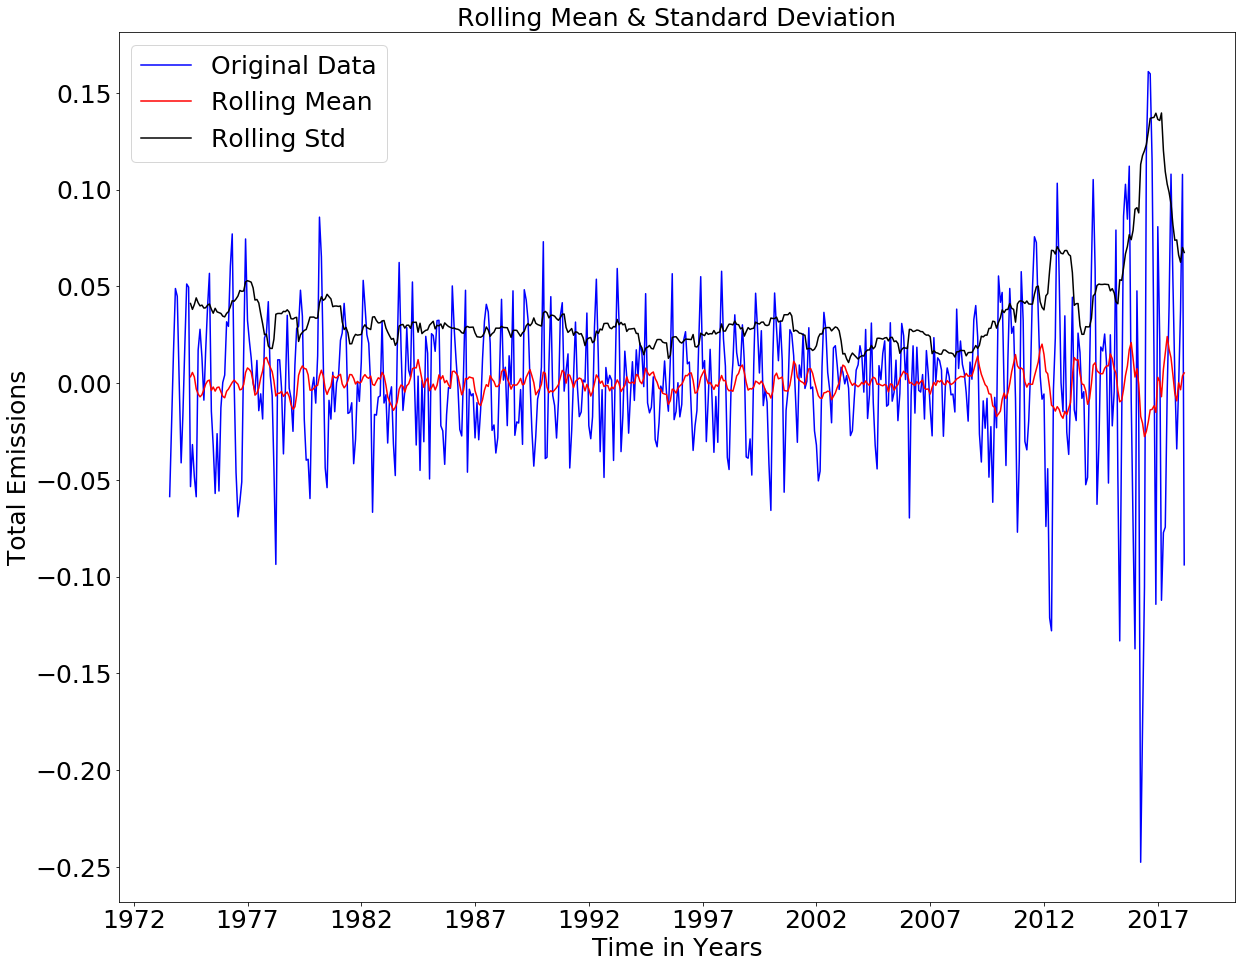

In [37]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
TestStationaryPlot(ts_log_decompose)

In [38]:
TestStationaryAdfuller(ts_log_decompose)

Test Statistic                -1.062696e+01
p-value                        5.334452e-19
#Lags Used                     1.400000e+01
Number of Observations Used    5.210000e+02
Critical Value (1%)           -3.442964e+00
Critical Value (5%)           -2.867103e+00
Critical Value (10%)          -2.569733e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [39]:
from statsmodels.tsa.stattools import acf, pacf

In [40]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

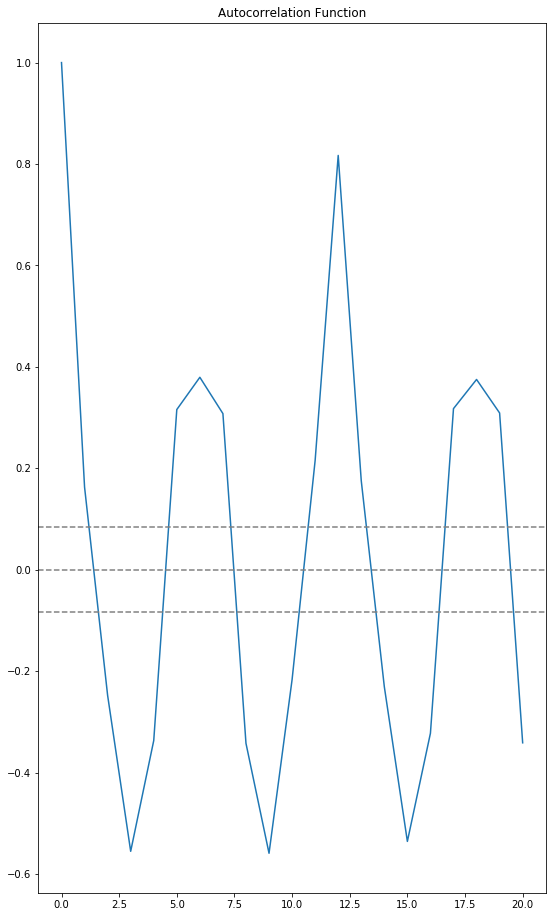

In [41]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

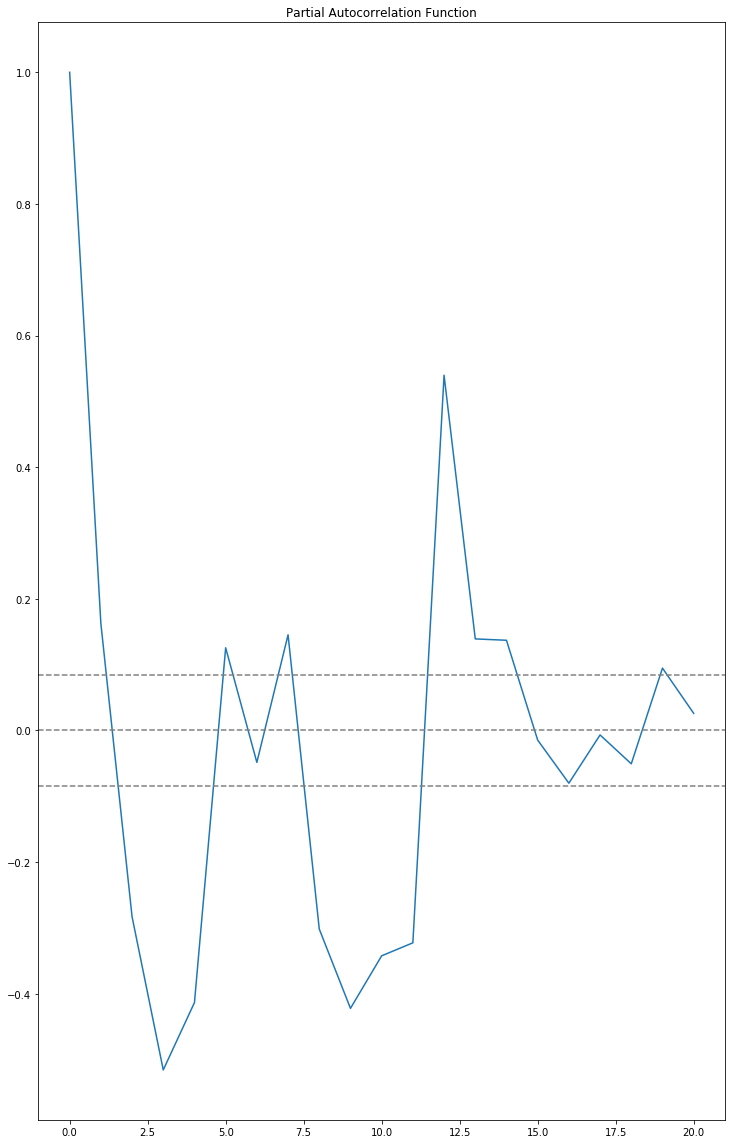

In [42]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [60]:
from statsmodels.tsa.stattools import ARMA
def best_AR_MA_checker(df,lower,upper):
    from statsmodels.tsa.stattools import ARMA
    from statsmodels.tsa.stattools import adfuller
    arg=np.arange(lower,upper)
    arg1=np.arange(lower,upper)
    best_param_i=0
    best_param_j=0
    temp=12000000
    rs=99
    for i in arg:
        for j in arg1:
            model=ARMA(df, order=(i,0,j))
            result=model.fit(disp=0)
            resid=adfuller(result.resid)
            if (result.aic<temp and  adfuller(result.resid)[1]<0.05):
                temp=result.aic
                best_param_i=i
                best_param_j=j
                rs=resid[1]
                
                
            print ("AR: %d, MA: %d, AIC: %d; resid stationarity check: %d"%(i,j,result.aic,resid[1]))
            
    print("the following function prints AIC criteria and finds the paramters for minimum AIC criteria")        
    print("best AR: %d, best MA: %d, best AIC: %d;  resid stationarity check:%d"%(best_param_i, best_param_j, temp, rs))     
best_AR_MA_checker(ts_log_decompose,1,6) #For each parameter I want to try from 0 to 2

AR: 1, MA: 1, AIC: -2039; resid stationarity check: 0
AR: 1, MA: 2, AIC: -2039; resid stationarity check: 0
AR: 1, MA: 3, AIC: -2039; resid stationarity check: 0
AR: 1, MA: 4, AIC: -2039; resid stationarity check: 0
AR: 1, MA: 5, AIC: -2039; resid stationarity check: 0
AR: 2, MA: 1, AIC: -2083; resid stationarity check: 0
AR: 2, MA: 2, AIC: -2083; resid stationarity check: 0
AR: 2, MA: 3, AIC: -2083; resid stationarity check: 0
AR: 2, MA: 4, AIC: -2083; resid stationarity check: 0
AR: 2, MA: 5, AIC: -2083; resid stationarity check: 0
AR: 3, MA: 1, AIC: -2090; resid stationarity check: 0
AR: 3, MA: 2, AIC: -2090; resid stationarity check: 0
AR: 3, MA: 3, AIC: -2090; resid stationarity check: 0
AR: 3, MA: 4, AIC: -2090; resid stationarity check: 0
AR: 3, MA: 5, AIC: -2090; resid stationarity check: 0
AR: 4, MA: 1, AIC: -2098; resid stationarity check: 0
AR: 4, MA: 2, AIC: -2098; resid stationarity check: 0
AR: 4, MA: 3, AIC: -2098; resid stationarity check: 0
AR: 4, MA: 4, AIC: -2098; re

In [46]:
from statsmodels.tsa.stattools import ARMA
model = ARMA(ts_log_decompose, order=(2,1))
results = model.fit(trend='nc', method='css-mle')
print(results.summary())
RSS = np.sum((results.resid)**2)
print(RSS)

                                         ARMA Model Results                                         
Dep. Variable:     Coal Electric Power Sector CO2 Emissions   No. Observations:                  536
Model:                                           ARMA(2, 1)   Log Likelihood                1100.308
Method:                                             css-mle   S.D. of innovations              0.031
Date:                                      Sun, 02 Dec 2018   AIC                          -2192.616
Time:                                              02:22:05   BIC                          -2175.480
Sample:                                          07-31-1973   HQIC                         -2185.912
                                               - 02-28-2018                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [50]:
model = ARMA(ts_log_decompose, order=(4,3))
results = model.fit(trend='nc', method='css-mle')
print(results.summary())
RSS = np.sum((results.resid)**2)
print(RSS)

C:\Users\vinay\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                         ARMA Model Results                                         
Dep. Variable:     Coal Electric Power Sector CO2 Emissions   No. Observations:                  536
Model:                                           ARMA(4, 3)   Log Likelihood                1109.451
Method:                                             css-mle   S.D. of innovations              0.030
Date:                                      Sun, 02 Dec 2018   AIC                          -2202.903
Time:                                              02:30:15   BIC                          -2168.630
Sample:                                          07-31-1973   HQIC                         -2189.494
                                               - 02-28-2018                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [52]:
model = ARMA(ts_log_decompose, order=(5,4))
results = model.fit(trend='nc', method='css-mle')
print(results.summary())
RSS = np.sum((results.resid)**2)
print(RSS)

C:\Users\vinay\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                         ARMA Model Results                                         
Dep. Variable:     Coal Electric Power Sector CO2 Emissions   No. Observations:                  536
Model:                                           ARMA(5, 4)   Log Likelihood                1130.915
Method:                                             css-mle   S.D. of innovations              0.029
Date:                                      Sun, 02 Dec 2018   AIC                          -2241.830
Time:                                              02:36:09   BIC                          -2198.989
Sample:                                          07-31-1973   HQIC                         -2225.069
                                               - 02-28-2018                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [53]:
model = ARMA(ts_log_decompose, order=(6,5))
results = model.fit(trend='nc', method='css-mle')
print(results.summary())
RSS = np.sum((results.resid)**2)
print(RSS)

C:\Users\vinay\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                         ARMA Model Results                                         
Dep. Variable:     Coal Electric Power Sector CO2 Emissions   No. Observations:                  536
Model:                                           ARMA(6, 5)   Log Likelihood                1141.493
Method:                                             css-mle   S.D. of innovations              0.029
Date:                                      Sun, 02 Dec 2018   AIC                          -2258.986
Time:                                              02:39:31   BIC                          -2207.577
Sample:                                          07-31-1973   HQIC                         -2238.874
                                               - 02-28-2018                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [55]:
model = ARMA(ts_log_decompose, order=(8,6))
results = model.fit(trend='nc', method='css-mle')
print(results.summary())
RSS = np.sum((results.resid)**2)
print(RSS)

C:\Users\vinay\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                         ARMA Model Results                                         
Dep. Variable:     Coal Electric Power Sector CO2 Emissions   No. Observations:                  536
Model:                                           ARMA(8, 6)   Log Likelihood                1145.872
Method:                                             css-mle   S.D. of innovations              0.028
Date:                                      Sun, 02 Dec 2018   AIC                          -2261.745
Time:                                              02:42:50   BIC                          -2197.483
Sample:                                          07-31-1973   HQIC                         -2236.604
                                               - 02-28-2018                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------